# 6.3. Модуль requests

# A
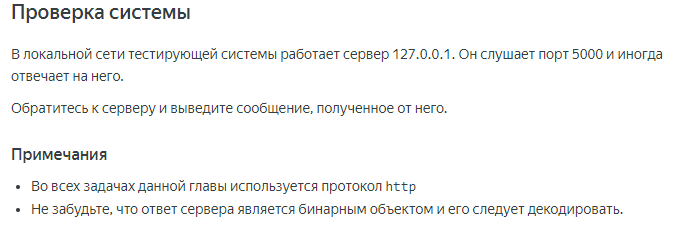

In [ ]:
from requests import get

response = get('http://127.0.0.1:5000')
print(response.text)

In [ ]:
# Пользовательский ввод:

# Данные сервера:
Привет!

# Вывод
# Привет!


# Пользовательский ввод:

# Данные сервера:
Сервер работает в штатном режиме

# Вывод
# Сервер работает в штатном режиме

# B
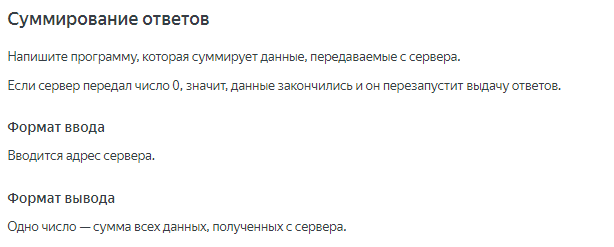

In [ ]:
from requests import get

url = 'http://' + input()
sum_ = 0
while True:
    request = get(url)
    num = int(request.text)
    if num == 0:
        break
    sum_ += num
print(sum_)

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
# Данные сервера:
1
2
3
0

# Вывод
# 6

# Пользовательский ввод:
127.0.0.1:8080
# Данные сервера:
7
3
-5
2
0

# Вывод
# 7

# C
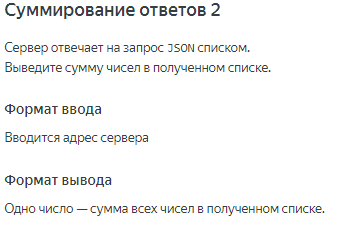

In [ ]:
from requests import get

url = 'http://' + input()
request = get(url).json()
num = (int(n) for n in request if isinstance(n, int))
print(sum(num))

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
# Данные сервера:
[1, 2, "ошибка", 3]

# Вывод
# 6

# Пользовательский ввод:
127.0.0.1:8080
# Данные сервера:
[7, 3, ["ошибка"], -5, 2]

# Вывод
# 7

# D
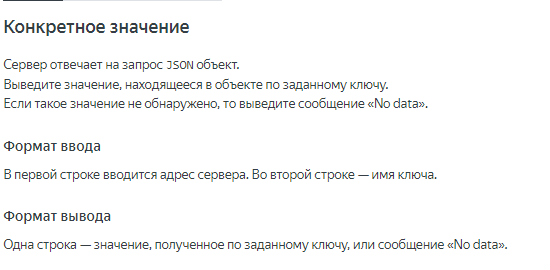

In [ ]:
from requests import get

url = 'http://' + input()
key = input()
request = get(url).json()
print(request.get(key, 'No data'))

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
second
# Данные сервера:
{"first": "1", "second": "2"}

# Вывод
# 2

# Пользовательский ввод:
127.0.0.1:8080
second
# Данные сервера:
{"first": "1", "third": "3"}

# Вывод
# No data

# E
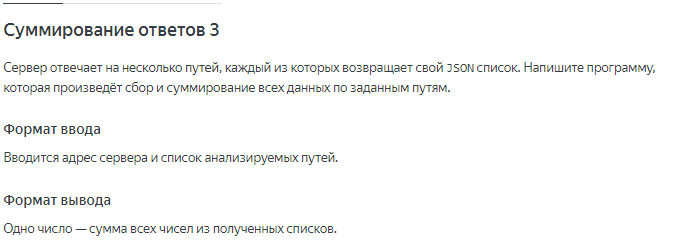

In [ ]:
## E

from requests import get
from sys import stdin

url = 'http://' + input()
path_list = stdin.readlines()
sum_ = 0  
for i in path_list:
    request = get(url + i.rstrip('\n')).json()
    sum_ += sum(request)
print(sum_)

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
/first
/third
# Данные сервера:
/first -> [1, 2, 3]
/second -> [2, 4, 6]
/third -> [3, 6, 9]

# Вывод
# 24

# Пользовательский ввод:
127.0.0.1:8080
/second
# Данные сервера:
/first -> [1, 2, 3]
/second -> [2, 4, 6]
/third -> [3, 6, 9]

# Вывод
# 12

# F
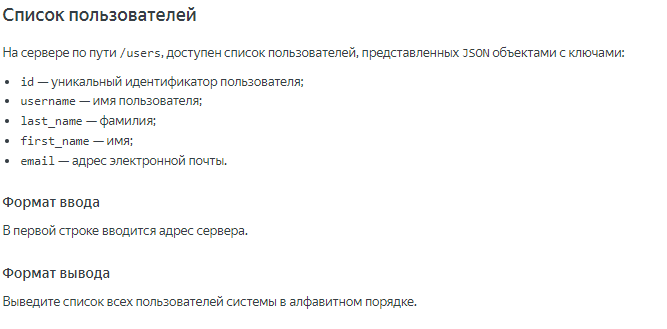

In [ ]:
## F

from requests import get

url = 'http://' + input() + '/users'
users = get(url).json()
users_name = []
for user in users:
    users_name.append(' '.join((user.get('last_name', 'Error'), user.get('first_name', 'Error'))))
users_name.sort()
print(*users_name, sep='\n')

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
# Данные сервера:
[
    {
        "id": 1,
        "username": "first",
        "last_name": "Петрова",
        "first_name": "Елизавета",
        "email": "e.petrova@server.none"
    },
    {
        "id": 2,
        "username": "second",
        "last_name": "Иванов",
        "first_name": "Василий",
        "email": "vas.ivanov@server.none"
    },
    {
        "id": 3,
        "username": "third",
        "last_name": "Иванов",
        "first_name": "Виктор",
        "email": "vik.ivanov@server.none"
    }
]

# Вывод
# Иванов Василий
# Иванов Виктор
# Петрова Елизавета

# G
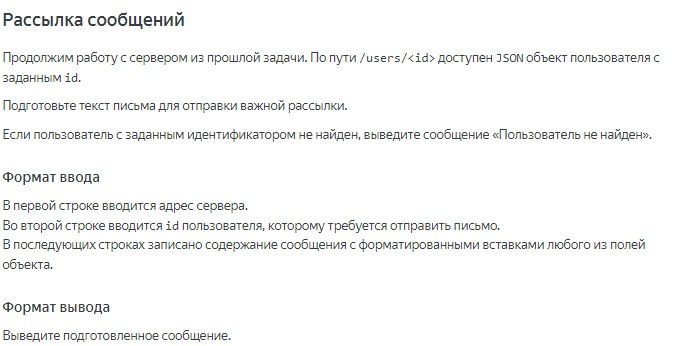

In [ ]:
## G

from requests import get
from sys import stdin

url = 'http://' + input() + '/users/'
id_user = input()
message = stdin.read()
request = get(url + id_user)
if request.status_code != 200:
    print('Пользователь не найден')
else:
    request = request.json()
    print(message.format(**request))



In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
2
Письмо для: {email}
Здравствуйте, {last_name} {first_name}
Мы рады сообщить вам о предстоящей акции!
Все подробности на нашем сайте
С уважением, команда тестового сервера!
# Данные сервера:
[
    {
        "id": 1,
        "username": "first",
        "last_name": "Петрова",
        "first_name": "Елизавета",
        "email": "e.petrova@server.none"
    },
    {
        "id": 2,
        "username": "second",
        "last_name": "Иванов",
        "first_name": "Василий",
        "email": "vas.ivanov@server.none"
    },
    {
        "id": 3,
        "username": "third",
        "last_name": "Иванов",
        "first_name": "Виктор",
        "email": "vik.ivanov@server.none"
    }
]

# Вывод
# Письмо для: vas.ivanov@server.none
# Здравствуйте, Иванов Василий
# Мы рады сообщить вам о предстоящей акции!
# Все подробности на нашем сайте
# С уважением, команда тестового сервера!

# Пользовательский ввод:
127.0.0.1:5000
2
Письмо для: {email}
Здравствуйте, {last_name} {first_name} ({username})
Мы рады сообщить вам о предстоящей акции!
Все подробности на нашем сайте
С уважением, команда тестового сервера!
# Данные сервера:
[
    {
        "id": 1,
        "username": "first",
        "last_name": "Петрова",
        "first_name": "Елизавета",
        "email": "e.petrova@server.none"
    }
]

# Вывод
# Пользователь не найден

# H
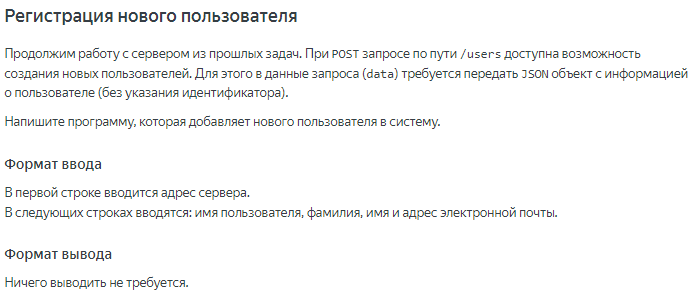

In [ ]:
## H

from requests import post

url = 'http://' + input() + '/users'
user = {}
user["username"] = input()
user["last_name"] = input()
user["first_name"] = input()
user["email"] = input()
post(url, json=user)

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
fourth
Петров
Кирилл
k.petrov@server.none
# Данные сервера:
[
    {
        "id": 1,
        "username": "first",
        "last_name": "Петрова",
        "first_name": "Елизавета",
        "email": "e.petrova@server.none"
    },
    {
        "id": 2,
        "username": "second",
        "last_name": "Иванов",
        "first_name": "Василий",
        "email": "vas.ivanov@server.none"
    },
    {
        "id": 3,
        "username": "third",
        "last_name": "Иванов",
        "first_name": "Виктор",
        "email": "vik.ivanov@server.none"
    }
]

# Вывод
# # Данные сервера:
# [
#     {
#         "id": 1,
#         "username": "first",
#         "last_name": "Петрова",
#         "first_name": "Елизавета",
#         "email": "e.petrova@server.none"
#     },
#     {
#         "id": 2,
#         "username": "second",
#         "last_name": "Иванов",
#         "first_name": "Василий",
#         "email": "vas.ivanov@server.none"
#     },
#     {
#         "id": 3,
#         "username": "third",
#         "last_name": "Иванов",
#         "first_name": "Виктор",
#         "email": "vik.ivanov@server.none"
#     },
#     {
#         "username": "fourth",
#         "last_name": "Петров",
#         "first_name": "Кирилл",
#         "email": "k.petrov@server.none",
#         "id": 4
#     }
# ]

# I
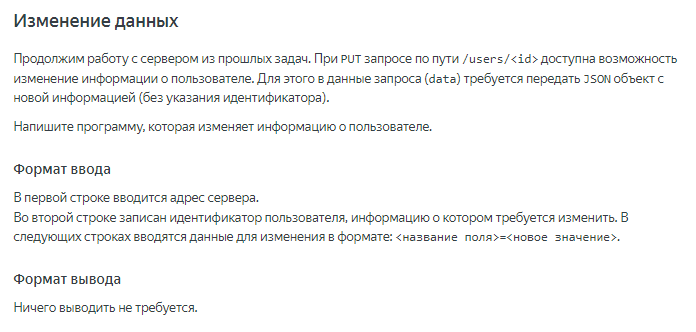

In [ ]:
## I

from requests import put
from sys import stdin

url = 'http://' + input() + '/users/'
id_user = input()
url += str(id_user)
data_ = stdin.readlines()
user = {}
for line in data_:
    key, value = line.rstrip('\n').split('=', maxsplit=1)
    user[key] = value
put(url, json=user)

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
2
username=ivanov_vasily
email=ivanov_vasily@server.none
# Данные сервера:
[
    {
        "id": 1,
        "username": "first",
        "last_name": "Петрова",
        "first_name": "Елизавета",
        "email": "e.petrova@server.none"
    },
    {
        "id": 2,
        "username": "second",
        "last_name": "Иванов",
        "first_name": "Василий",
        "email": "vas.ivanov@server.none"
    },
    {
        "id": 3,
        "username": "third",
        "last_name": "Иванов",
        "first_name": "Виктор",
        "email": "vik.ivanov@server.none"
    }
]

# Вывод
# # Данные сервера:
# [
#     {
#         "id": 1,
#         "username": "first",
#         "last_name": "Петрова",
#         "first_name": "Елизавета",
#         "email": "e.petrova@server.none"
#     },
#     {
#         "id": 2,
#         "username": "ivanov_vasily",
#         "last_name": "Иванов",
#         "first_name": "Василий",
#         "email": "ivanov_vasily@server.none"
#     },
#     {
#         "id": 3,
#         "username": "third",
#         "last_name": "Иванов",
#         "first_name": "Виктор",
#         "email": "vik.ivanov@server.none"
#     }
# ]

# J
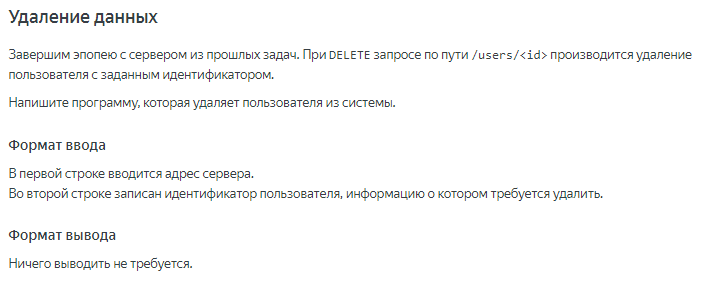

In [ ]:
## J

from requests import delete

url = 'http://' + input() + '/users/' + input()
delete(url)

In [ ]:
# Пользовательский ввод:
127.0.0.1:5000
2
# Данные сервера:
[
    {
        "id": 1,
        "username": "first",
        "last_name": "Петрова",
        "first_name": "Елизавета",
        "email": "e.petrova@server.none"
    },
    {
        "id": 2,
        "username": "second",
        "last_name": "Иванов",
        "first_name": "Василий",
        "email": "vas.ivanov@server.none"
    },
    {
        "id": 3,
        "username": "third",
        "last_name": "Иванов",
        "first_name": "Виктор",
        "email": "vik.ivanov@server.none"
    }
]

# Вывод
# # Данные сервера:
# [
#     {
#         "id": 1,
#         "username": "first",
#         "last_name": "Петрова",
#         "first_name": "Елизавета",
#         "email": "e.petrova@server.none"
#     },
#     {
#         "id": 3,
#         "username": "third",
#         "last_name": "Иванов",
#         "first_name": "Виктор",
#         "email": "vik.ivanov@server.none"
#     }
# ]